# Verifying the Cleaning of Count Rates of XMM Observations

### Motivation

When it comes to observing and analyzing data from distant celestial objects, we often encounter various challenges. One such challenge is the presence of flares, which are sudden and intense bursts of radiation that can distort and obscure astronomical data. Flares can come from a variety of sources, but primarily solar flares cause problems. These events can be extremely difficult to detect and analyze, as they can occur unpredictably and with varying intensities. Therefore, removing or mitigating the effects of flares is crucial for accurate and reliable astronomical data analysis.

When observing celestial objects, astronomers often use instruments that can detect individual photons or particles of radiation. These instruments produce data in the form of events lists, which record the properties of each detected particle, such as its energy, arrival time, and position. However, as mentioned earlier, flares can produce sudden and intense bursts of radiation that can distort these events lists, making it difficult to accurately identify and analyze individual particles. In some cases, the data may even become unusable, as the flares can overwhelm the detectors and saturate the data acquisition system.

Count rate plots are a useful tool for visualizing the impact of flares on astronomy data. They show the rate at which particles are detected over time, allowing astronomers to identify periods of increased or decreased activity. Flares can often be seen as sudden spikes in the count rate, indicating a large number of particles detected in a short period of time.

By cleaning flared astronomy data, we can remove these spikes and other distortions, allowing us to more accurately identify and analyze individual particles in the events list. This can lead to more precise measurements of the properties of celestial objects, such as their distance, mass, and composition. Additionally, cleaning flared data can help us identify and study rare or unusual events, such as supernovae or gamma-ray bursts, that may be hidden in the noise of the flares.

### Loading QDP Files

To load QDP files through the terminal, you need to have HEASOFT and SAS setup in the bash script. This allows easier access to plotting the QDP files when required. To open a QDP file, type the command "qdp myfile.qdp" and then it prompts you to enter a PGPLOT file/type. Type '/xs' to open a separate window, which contains the plots corresponding to the QDP file.

### Cleaning Algorithm

After an observation is taken, we get an events list which contains the count rates per second. Some of the data might be 'flared', which represents a higher number of count rates than usual. To get a good image from the events list of the observation, we need to remove this flaring as much as we can. A cleaning algorithm has been used to do this, which plots a histogram of the count rates and removes the count rates that are not in the interval of the selected limits (shown as red vertical bars in the histogram plots).

### 'Good' Plot (Properly Cleaned)

Loading the count rate plots for Observation ID 0012440101 and the corresponding M1, M2 and PN cameras.

<div>
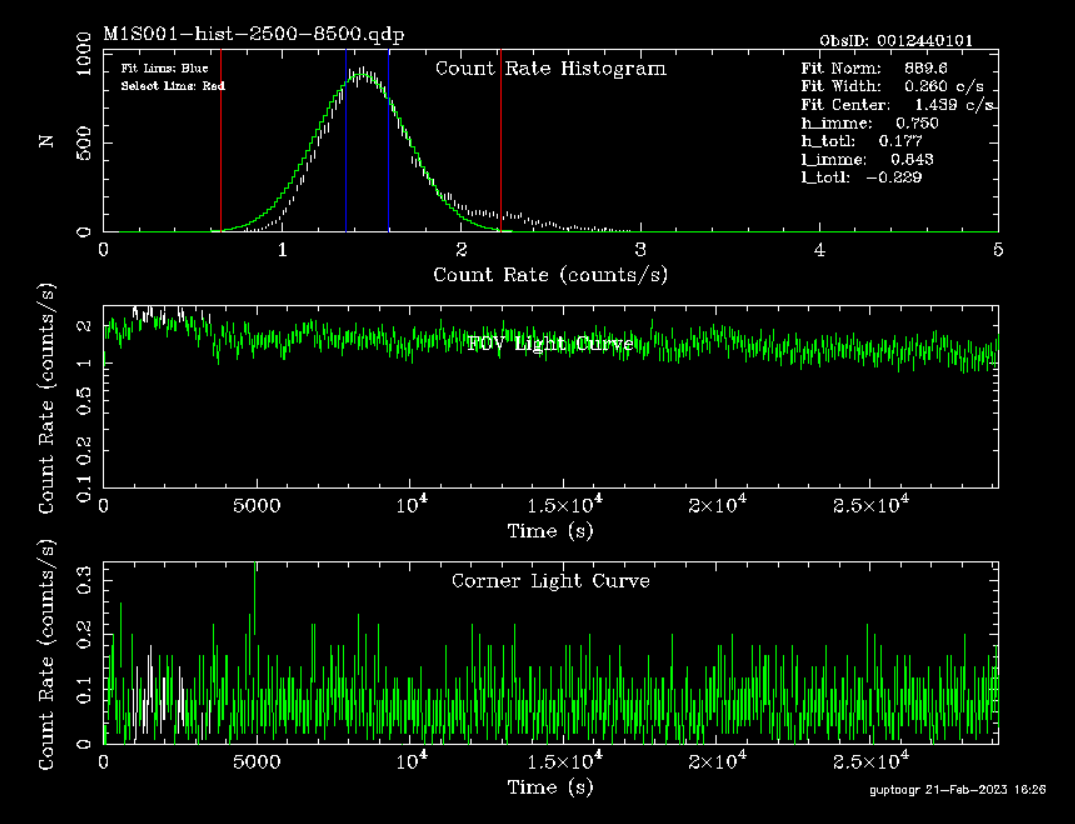
</div>

<div>
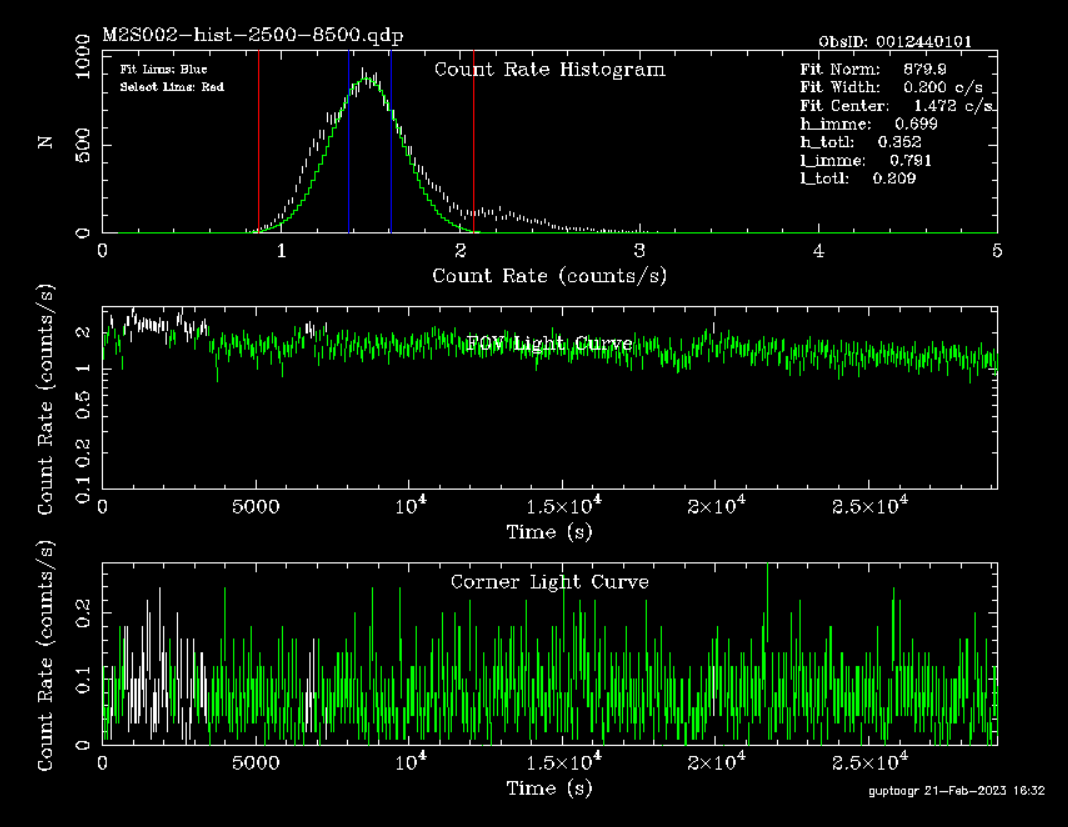
</div>

<div>
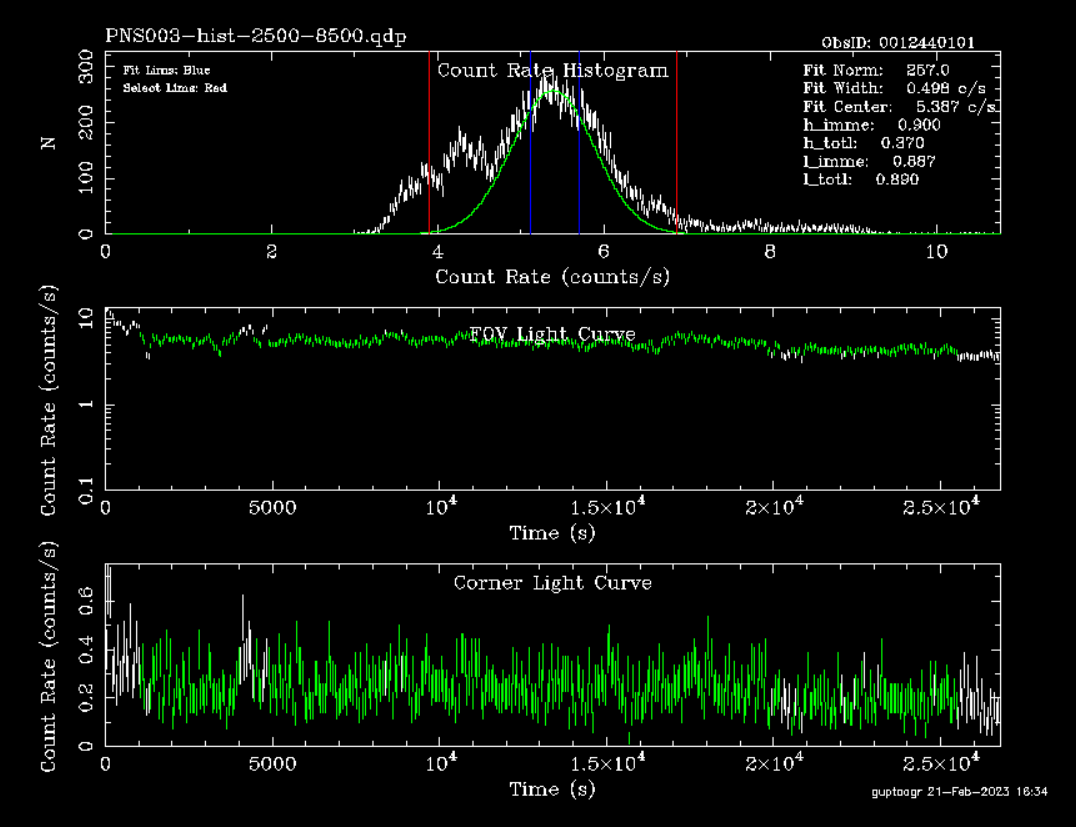
</div>

In the plots above, we can see that the cleaning algorithm has been correctly applied. The count rates above and below those determined by the Gaussian (in the histogram) have been removed/cleaned from the data. These removed count rates are displayed in white. All the remaining count rates are displayed in green, which are to be used in the cleaned events lists to obtain an image of the observation.

In [1]:
%matplotlib inline
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import ImageNormalize, LogStretch, MinMaxInterval
from astropy.wcs import WCS
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
import os
import matplotlib.pyplot as plt

In [2]:
def xrayimg(obs_id,cam,energy,typ):
    image_file = get_pkg_data_filename(obs_id+'/images/'+obs_id+'_'+cam+'_'+energy+'keV'+typ+'.fits')
    image_data = fits.getdata(image_file, ext=0)
    plt.figure(figsize=(10, 8))
    if typ == 'img':
        norm = ImageNormalize(image_data, MinMaxInterval(), stretch=LogStretch())
        plt.imshow(image_data, origin='lower', cmap='plasma', norm=norm)
        plt.colorbar()
    else:
        plt.imshow(image_data, origin='lower', cmap='plasma')
        plt.colorbar()

In [3]:
def hist(obs_id, cam, bins):
    with fits.open(obs_id+'/'+cam+'_clean.fits') as hdu:
        asn_table = Table(hdu[1].data)
    plt.hist(asn_table[0][:], bins=bins)

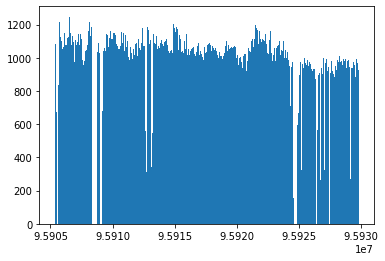

In [4]:
hist('0012440101','PN',500)

The histogram above is obtained from the cleaned events list of the PN camera of ObsID 0012440101. This can also be used to verify the cleaning of the data by looking at the gaps in the histogram, which indicate the removed (white) count rates in the QDP plot.

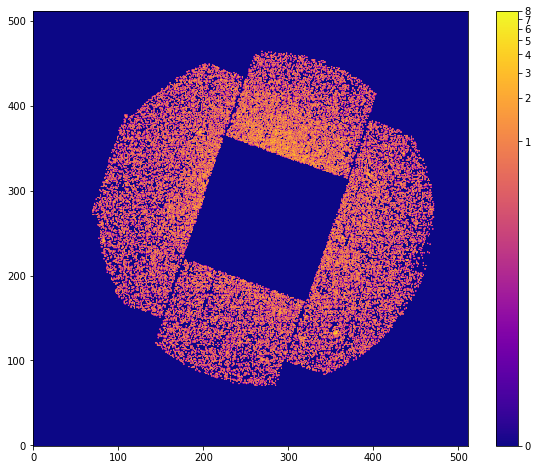

In [5]:
xrayimg('0012440101','mos1','2.0-10.0','img')

This is an image of ObsID 0012440101, corresponding to the M1 camera and in the energy range 2.0-10.0 keV, which is obtained from the cleaned events list.

### 'Bad' Plot (Improperly Cleaned)

Loading the count rate plots for Observation ID 0201900501 and the corresponding M1 camera.

<div>
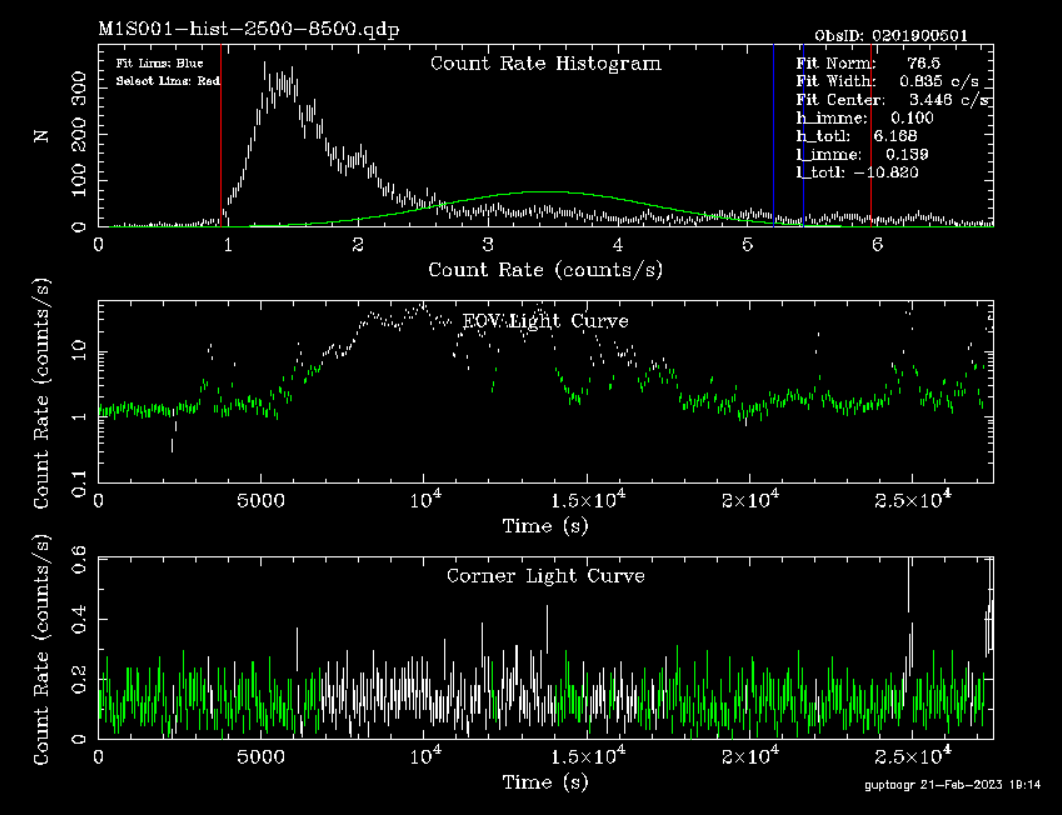
</div>

In the plot above, a proper Gaussian could have been easily fit in the Count Rate Histogram. However, a glitch in the cleaning algorithm might have resulted in improper cleaning and fitting of data. Thus, it can be observed that relatively higher count rates are green, which should instead have been white.

The corresponding M2 camera plot can also be seen for this observation, where the cleaning algorithm was correctly applied.

<div>
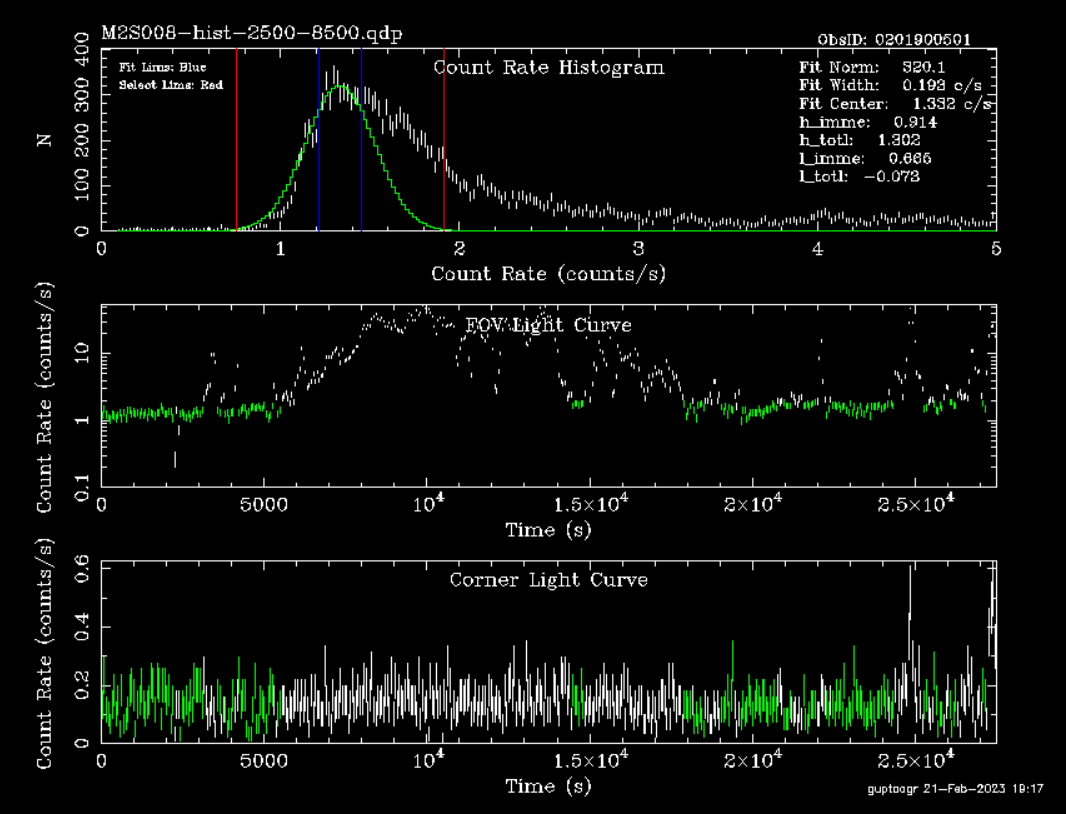
</div>

In the plot above, the cleaning algorithm was applied correctly and it can be seen that more count rates have been removed, as it should have been the case for M1 as well.

### 'Bad' Plot (Flared Data)

Loading the count rate plots for Observation ID 0402190501 and the corresponding M1 and M2 camera.

<div>
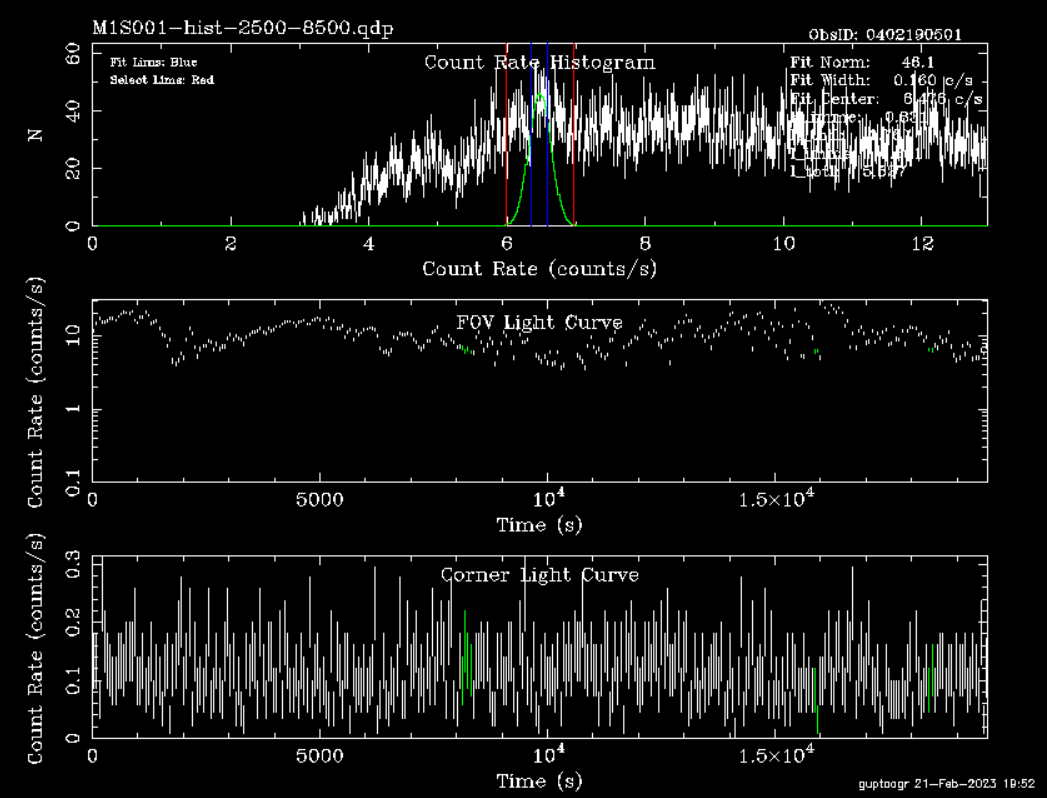
</div>

<div>
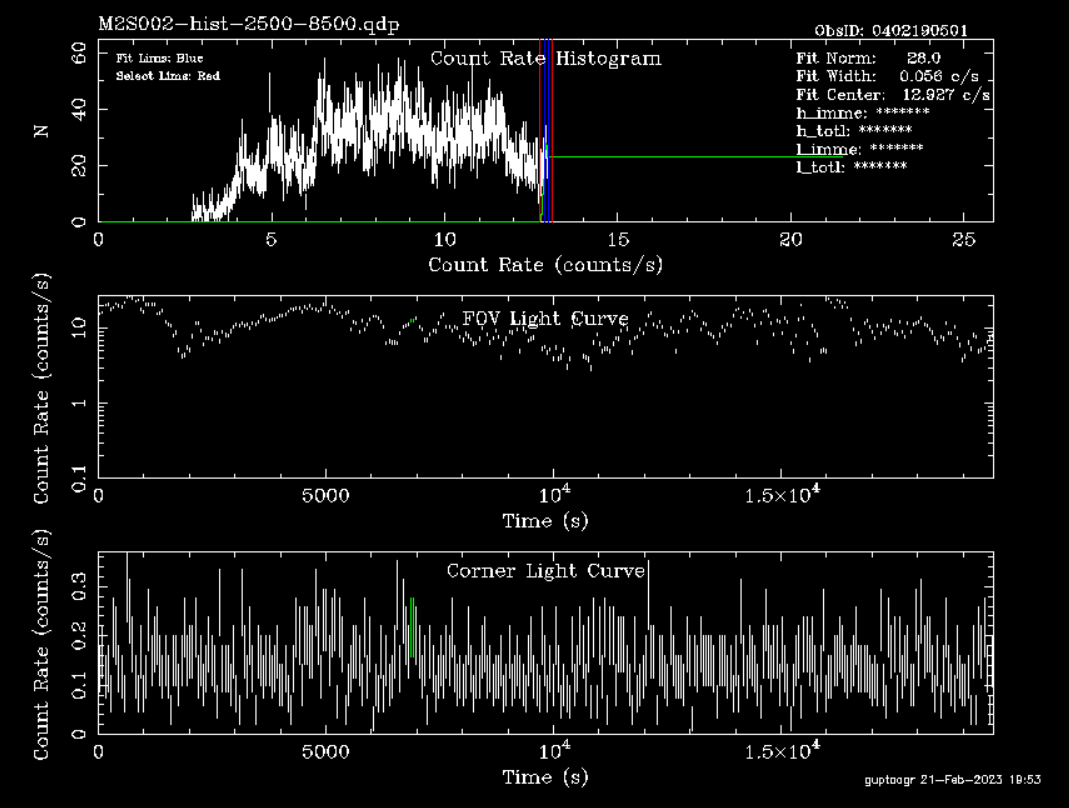
</div>

In the plots above, it can be seen that either the entire data or most of the data is flared. Thus, the cleaned events list would have a very low number of count rates, which can be verified by creating an image of the observation.

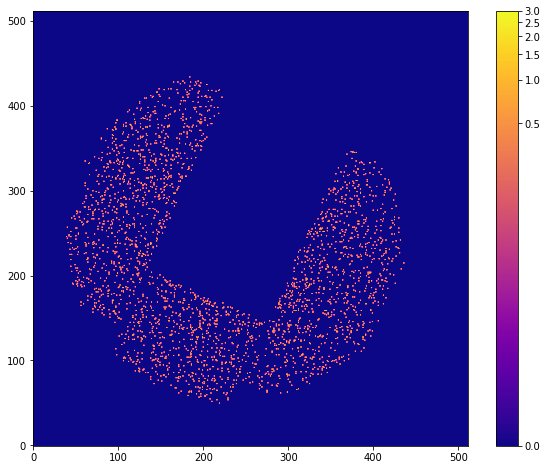

In [6]:
xrayimg('0402190501','mos1','2.0-10.0','img')

Here, it can be seen that there's hardly an image and only a few pixels, which indicate the low number of count rates in the cleaned events list.

Note - There are also observations in which the entire data is flared, which means that there is no cleaned events list, thus there is no corresponding image as none of the data could be used to create an image.